### 利用深度学习识别卫星数据

在本次作业中我们将会使用深度学习来解决分类问题。 给定的数据在 “point_data.csv”文件里，这个数据总共包含了5个类别（由Class_ID来区分）, 并包括10个特征。在这里，我们需要搭建多层的神经网络（具体细节在下面给出），并利用这个网络来识别分类。

In [1]:
# 导入library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO 导入跟keras相关的libraray
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

# 以下是跟sklearn相关的库
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

Using TensorFlow backend.


In [2]:
# 导入数据

# TODO 设置数据文件的位置(path)
filename = 'point_data.csv'

dataset = pd.read_csv(filename)
list(dataset)

['x',
 'y',
 'Class_ID',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B11',
 'B12',
 'Class',
 'Description']

In [3]:
dataset['Class_ID'].shape
dataset.isnull().any()

x              False
y              False
Class_ID       False
B2             False
B3             False
B4             False
B5             False
B6             False
B7             False
B8             False
B8A            False
B11            False
B12            False
Class          False
Description    False
dtype: bool

数据分类：
- 类别1： Parking/road/pavement  停车场/公路/路面
- 类别2： Building               建筑
- 类别3： Tree/bushes            树/灌木
- 类别4： Grass                  草
- 类别5： Water                  水


In [4]:
# 定义标签Y和特征X

# TODO: Y: 读取Class_ID字段
Y = dataset['Class_ID']

# TODO：总共10个特征，分别读取 'B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12' 字段
X = dataset.drop(['x', 'y', 'Class_ID', 'Class', 'Description'], axis=1)
X = np.array(X)
# TODO: 对Y做一个简单的转换（不然会在keras部分会出错）
Y = np.array(Y)


In [5]:
# 把数据分成训练数据和测试数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [6]:
# TODO: 做数据的归一化 （利用preporcessing.scale函数，详情查看官方文档）
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test =  preprocessing.scale(X_test)

/home/bishi/anaconda3/envs/tfgpu/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/bishi/anaconda3/envs/tfgpu/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# 定义深度学习模型： 模型总共包含4层hidden layer, 第一层包括50个hidden units, 第二层包括50个hidden units, 第三层包括60个hidden units, 
#                第四层包括40个hidden units. 并在第一层hidden layer和第二层hidden layer之间添加一个dropout layer (rate=0.2),
#                在第二层和第三层hidden layer之间添加dropout layer（rate=0.2）, 第三层和第四层之间添加dropout layer（rate=0.1）。

# TODO: 定义各类变量（比如输入维度的大小，输出维度的大小，hidden layer的unit个数等）
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(40, activation='relu'))

# TODO: 定义深度学习模型
model.add(layers.Dense(6, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# 输出模型描述
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3060      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2440      
__________

In [9]:
#  定义SGD(stochastic gradient descent优化器)，学习率为0.01.  
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [10]:
# 定义模型的compile函数，设置loss为sparse_categorical_crossentropy, 利用上面定义的sgd优化器，利用准确率作为评估标准
model.compile(optimizer=sgd,
                      loss = 'sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [11]:
# TODO: 训练模型，设置epoch为100， batch_Size为100，并把训练数据中的15%作为validation data(验证集), 把中间的结果都赋给history变量（后面做分析用）  
history = model.fit(X_train,
                    Y_train, 
                    epochs=100, 
                    batch_size=100, 
                    validation_split=0.15, 
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 16282 samples, validate on 2874 samples
Epoch 1/100
16282/16282 [==============================] - 1s 72us/step - loss: 0.8092 - acc: 0.7309 - val_loss: 0.3365 - val_acc: 0.8855
Epoch 2/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.3786 - acc: 0.8646 - val_loss: 0.2885 - val_acc: 0.8960
Epoch 3/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.3289 - acc: 0.8811 - val_loss: 0.2581 - val_acc: 0.9064
Epoch 4/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.2938 - acc: 0.8923 - val_loss: 0.2381 - val_acc: 0.9144
Epoch 5/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.2742 - acc: 0.8992 - val_loss: 0.2243 - val_acc: 0.9175
Epoch 6/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.2540 - acc: 0.9072 - val_loss: 0.2094 - val_acc: 0.9245
Epoch 7/100
16282/16282 [==============================] - 0s 17us/step - l

16282/16282 [==============================] - 0s 18us/step - loss: 0.0912 - acc: 0.9677 - val_loss: 0.0645 - val_acc: 0.9767
Epoch 58/100
16282/16282 [==============================] - 0s 18us/step - loss: 0.0936 - acc: 0.9673 - val_loss: 0.0549 - val_acc: 0.9847
Epoch 59/100
16282/16282 [==============================] - 0s 18us/step - loss: 0.0931 - acc: 0.9690 - val_loss: 0.0618 - val_acc: 0.9861
Epoch 60/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.0885 - acc: 0.9688 - val_loss: 0.0583 - val_acc: 0.9854
Epoch 61/100
16282/16282 [==============================] - 0s 19us/step - loss: 0.0902 - acc: 0.9703 - val_loss: 0.0630 - val_acc: 0.9833
Epoch 62/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.0867 - acc: 0.9709 - val_loss: 0.0602 - val_acc: 0.9816
Epoch 63/100
16282/16282 [==============================] - 0s 17us/step - loss: 0.0850 - acc: 0.9718 - val_loss: 0.0634 - val_acc: 0.9788
Epoch 64/100
16282/16282 [==============

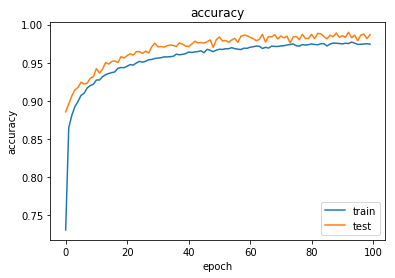

In [12]:
# 画一个图来表示准确率的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

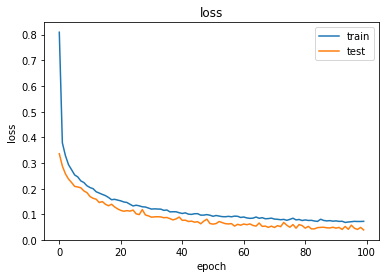

In [13]:
# 画一个图来表示LOSS的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
# 在测试数据上做评估
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test, batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

4789/4789 [==============================] - 0s 5us/step
[0.0463684879816675, 0.9830862526406722]
Baseline Error: 1.69%


In [15]:
# 预测结果
test_class = model.predict_classes(X_test)
print(test_class)

[3 2 2 ... 2 1 4]


Text(91.68, 0.5, 'predicted label')

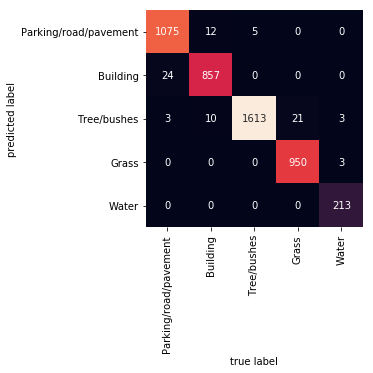

In [20]:
# TODO: 画混淆矩阵（confusion matrix
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
mat = metrics.confusion_matrix(Y_test, test_class)
target = ['Parking/road/pavement', 'Building', 'Tree/bushes', 'Grass', 'Water']
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= target,
            yticklabels= target)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [34]:
# TODO: 输出在测试集上的precision, recall, f1-score
y_pred = model.predict_classes(X_test)
precision = metrics.precision_score(Y_test, y_pred, average='macro')
recall = metrics.recall_score(Y_test, y_pred, average='macro')
f1_score = metrics.f1_score(Y_test, y_pred, average='macro')
print("precision: ", precision)
print("recall:    ", recall)
print("f1_score:  ", f1_score)

precision:  0.986323653492577
recall:     0.9796711935101936
f1_score:   0.9829188286388433


In [37]:
print(metrics.classification_report(Y_test, y_pred,
                            target_names=target))

                       precision    recall  f1-score   support

Parking/road/pavement       0.98      0.98      0.98      1102
             Building       0.97      0.97      0.97       879
          Tree/bushes       0.98      1.00      0.99      1618
                Grass       1.00      0.98      0.99       971
                Water       1.00      0.97      0.99       219

            micro avg       0.98      0.98      0.98      4789
            macro avg       0.99      0.98      0.98      4789
         weighted avg       0.98      0.98      0.98      4789

